This code shows how we compare the results of the curves (obtained from the R code) with the results from Resin

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import winsound 
import scipy.stats as stt
import networkx as nx

In [2]:
def expfun(x,a,b):
    fun = np.exp(a*(x-b)) / (1+ np.exp(a*(x-b)) )
    return fun

In [3]:
dx = 0.01
x = np.arange(-4,4+dx,dx)


Test plotting the curves from the Graded model

This step is on random data, just to check/show that the Graded model is working well

[2.0765780399767912, -0.2353600519547902, -1.097554814659027, -1.7072309730668191, -2.8771765631370387]


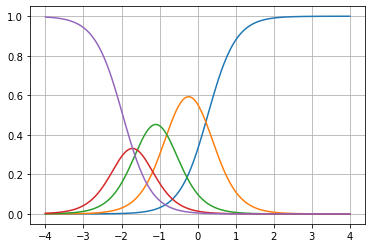

In [5]:
N_ans = 4
b = [0.268,-0.739, -1.459,-1.967]
a = -2.710

f = []
f_sum = x*0

mus = []

plt.figure()
for i in range(0,N_ans+1):
    if i==0:
        fi0 = x*0+1
    else:
        fi0 = fi
#     fi = expfun(x,a[i],b)
    if i == N_ans:
        fid = x*0+1 - f_sum
    else:
        fi = expfun(x,a,b[i])
        fid = fi0-fi
    
    f_sum += fid 
    
    mus.append(np.sum(x*fid/np.sum(fid)))
    
    plt.plot(x,fid)
    
plt.grid()

print(mus)

# Full data

#### Calculates the values of the curves from R

(This are the values obtained from the R code; here we want to extract the mean of each curve to compare it to Resin)

In [6]:
# These are the results from R
l = """
Q9_1,-2.065,-1.476,-1.071,-0.430,1.261
Q9_2,0.556,-0.658,-1.183,-1.946,-2.129
Q9_3,-1.800,-1.077,-0.449,0.503,1.828
Q9_4,0.628,-0.375,-1.039,-1.816,-2.614
Q9_5,-0.842,-1.374,-1.930,-2.371,-1.641
Q9_6,-0.038,-1.408,-2.323,-2.824,-1.667
Q9_7,0.177,-0.681,-1.092,-1.815,-1.874
Q9_8,0.268,-0.739,-1.459,-1.967,-2.710
"""
l1 = l.split('\n')

b_vec = []
a_vec = []
for lt in l1[1:-1]:
    uu = lt.split(',')
    b_vec.append(uu[1:5])
    a_vec.append(uu[5])

In [7]:
N_ans = 4

mus_vec = []

for j in range(0,len(a_vec)):
    b = np.array(b_vec[j]).astype(float)
    a = float(a_vec[j])

    f = []
    f_sum = x*0

    mus = []

#     plt.figure()
    for i in range(0,N_ans+1):
        if i==0:
            fi0 = x*0+1
        else:
            fi0 = fi
    #     fi = expfun(x,a[i],b)
        if i == N_ans:
            fid = x*0+1 - f_sum
        else:
            fi = expfun(x,a,b[i])
            fid = fi0-fi

        f_sum += fid 

        mus.append(np.sum(x*fid/np.sum(fid)))

    mus_vec.append(sorted(mus))

### Calculate for the network

In [10]:
# Import the network
filename = 'Network'
GG = nx.readwrite.gexf.read_gexf(filename+'.gexf')

Calculate the position of each node

In [12]:
pos = nx.spring_layout(GG,iterations=5000)

In [13]:
pos2 = [[],[]]
key_list = []
for key in pos:
    pos2[0].append(pos[key][0])
    pos2[1].append(pos[key][1])
    key_list.append(key)
#     pos2[2].append(pos[key][1])
    
# print(pos2)
# print(key_list)

In [14]:
# re-sort them

ii = 0
i_vec = []
index_vec = np.array(range(0,len(key_list)))

for qn, q in enumerate(["Q9_1","Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_7","Q9_8"]):
    for ans_n, ans in  enumerate(["Strongly Agree", 'Somewhat Agree', 'Neutral',
                                  'Somewhat Disagree', "Strongly Disagree"]):
        itemR = q+':'+ans
        el = int(index_vec[np.array(key_list) == itemR])
        i_vec.append(el)
    
key_list = np.array(key_list)
key_list = key_list[i_vec]

pos2[0] = np.array(pos2[0])
pos2[0] = pos2[0][i_vec]

pos2[1] = np.array(pos2[1])
pos2[1] = key_list[i_vec]


# key_list

In [15]:
pos3 = []
# for key in pos:
for key in key_list:
#     print(key)
    pos3.append([pos[key][0],pos[key][1]])
#     pos2[2].append(pos[key][1])
    
print(pos3)

[[-0.5271415217473637, -0.011019144750156473], [-0.2346756326217174, -0.37752188019050625], [-0.40132377694938226, -0.28810799863454906], [-0.13003579620868075, 0.01158098896416671], [0.7701238478211897, 0.2957940028859296], [0.9559118846964594, 0.403853264216373], [0.46855925990908404, 0.17095166116314728], [-0.3996621828567638, 0.1921448113947948], [-0.22487589131863656, -0.080284176901306], [-0.4999148288105827, -0.32297979055966125], [-0.5818277425480298, -0.2291399987567273], [-0.3316839626024013, -0.13578014538964572], [-0.029076823431824522, 0.04092828133853504], [0.5382976073386629, 0.30216447091953486], [0.891771349445785, 0.1737080251297875], [1.0, 0.31777862343026547], [0.49891583927030236, 0.09061836710695727], [-0.09993598050791508, 0.1512970897558402], [-0.2957298604708222, -0.22074103866853978], [-0.6128408382741765, -0.14318911312418553], [0.7784059625071857, 0.22480362605418389], [-0.04897248019658009, -0.2588504152802231], [-0.4426974443806112, -0.07097171681414155], 

Rotate them to make the mean axis parallel to the x-axis

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
pca.fit(pos3)
x_pca = pca.transform(pos3)

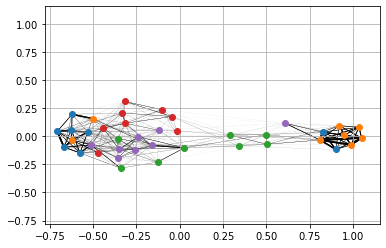

In [21]:
plt.figure()
xx = x_pca[:,0]
yy = x_pca[:,1]

mm = min(xx)*1.1
MM = max(xx)*1.1

# N_quest = 8
# N_ans = 5

koef = 3
for i1, key1 in enumerate(key_list):
    for i2, key2 in enumerate(key_list):
        if (key1, key2) in GG.edges:
            w = GG.get_edge_data(key1,key2)['weight']
#             print(w)

            if w > 0.:
                plt.plot([xx[i1],xx[i2]],[yy[i1],yy[i2]],'k',linewidth=koef*w**2,zorder=1)

index = np.array(range(0,len(xx)))+1
N_ans = 5
for a in range(0,N_ans): # 5 or 4?
    m = np.remainder(index,N_ans) == a
    plt.scatter(xx[m],yy[m],zorder=2)

plt.xlim([mm, MM])
plt.ylim([mm, MM])
plt.grid()

<font color='orange'>Rember that two items are inverted (that is why we have two "misplaced" items)</font> 

#### Set the data and calculate the corr

In [22]:
# mus_vec
# test = np.array(range(0,40))
values_from_our = []
for i in range(0,8):
    offset = i*5
    values_from_our += list(sorted(xx[0+offset:5+offset]))


In [23]:
mus_vec2 = []
for el in mus_vec:
    mus_vec2 += el

In [24]:
stt.spearmanr(values_from_our,mus_vec2)

SpearmanrResult(correlation=0.9726078799249531, pvalue=1.0997584416801647e-25)

In [25]:
stt.pearsonr(values_from_our,mus_vec2)

(0.9758934296726302, 9.984527256613792e-27)

Spearman and Pearson's correlation are almost identical!

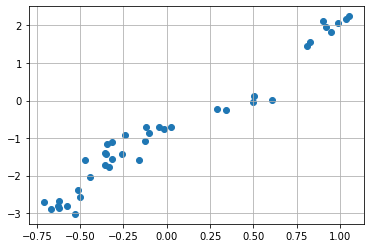

In [26]:
plt.figure()
plt.scatter(values_from_our,mus_vec2)
plt.grid()